In [ ]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [1]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n

In [2]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]

POP = [1000000]

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 1,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [3]:
def OBJ(X):
    w = X[0]
    P = X[1]
    Fy = X[2]
    

    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0

    R = [R_0] 
    S = [S_0] 
    G = [G_0]


    return R, S, G

In [4]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [ ]:
RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']

In [6]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 18,
                'Y AXIS SIZE': 18,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': ' $w$ (k/in)',
                'LABELS SIZE': 20,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 18,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Índice de falha (I):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

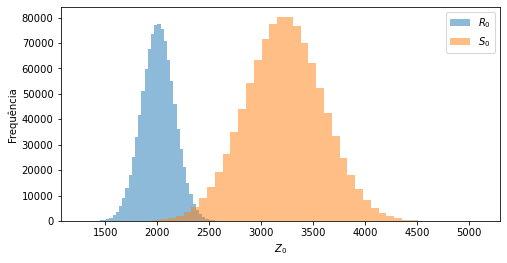

In [8]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#00000',
                    'X AXIS LABEL': '$Z_0$',
                    'Y AXIS LABEL': 'Frequência',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

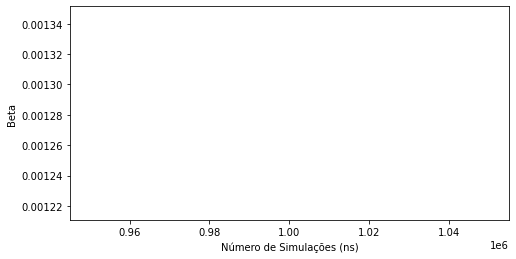

In [7]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'blue',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
max(POP)

In [ ]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
#MESMO DATAFRAME
Bf = [ ]
Af = [ ]
c = 100
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])

for i in POP:
   Af.append((RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].head(i).sum())/max(POP)) # soma valores anteriores de I_0 e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(len(POP)): #Salva os valores em um DF a cada 100 valores
    Bf.append((BETA_DF['PF'].sub(Af[i]).abs().idxmin())/1000)
  
plt.plot(POP, Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
plt.plot(POP, Af, color='blue')

In [ ]:
PF_AUX = []
BETA_AUX = []

for i in range (len(POP)):
    PF_AUX.append(RESULTS_TEST[i]['PROBABILITY OF FAILURE'][0])
    BETA_AUX.append(RESULTS_TEST[i]['BETA INDEX'][0])

plt.plot(POP, PF_AUX, color='blue')

In [ ]:
plt.plot(POP, BETA_AUX, color='blue')